In [8]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Generate Random Linear Distribution

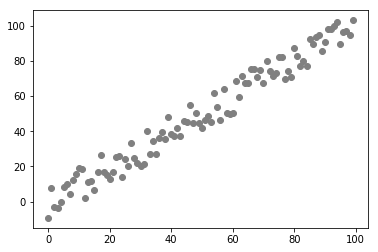

In [10]:
total_data = 100

x = np.arange(total_data)

np.random.shuffle(x)

delta = np.random.uniform(-10, 10, size = (total_data,))

y = x + delta

plt.scatter(x, y, color = 'gray')

plt.xticks()
plt.yticks()

plt.show()

In [11]:
training_size = 0.8

total = x.shape[0]

training_size = round(total * training_size)
validation_size = total - training_size

training_x = x[:training_size]
validation_x = x[training_size:]

training_X = training_x.reshape((training_size, 1))
validation_X = validation_x.reshape((validation_size, 1))

training_y = y[:training_size]
validation_y = y[training_size:]

Best Epoch: [99, 33.83793106864847]


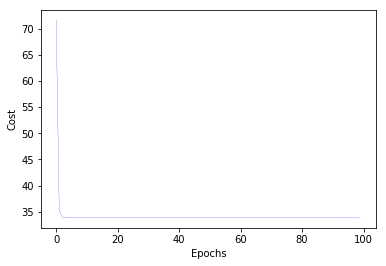

In [20]:
total_epoch = 100

regressor = linear_model.SGDRegressor(loss = "squared_loss", 
                                      shuffle = False,
                                      max_iter = 1,
                                      learning_rate = "constant",
                                      penalty = None,
                                      eta0 = 0.00001)


select = float('inf')
best_epoch = None
best_model = None

epochs = []

for epoch in range(total_epoch):
    
    regressor.partial_fit(training_X, training_y)
    prediction_y = regressor.predict(validation_X)
    mse = mean_squared_error(validation_y, prediction_y)
    
    if(mse < select):
        
        select = mse
        best_epoch = [epoch, mse]
        best_model = deepcopy(regressor)
    
    epochs.append([epoch, mse])
 

print("Best Epoch: " + str(best_epoch))

epochs = np.array(epochs)

plt.plot(epochs[:, 0:1], epochs[:, 1:2], linewidth = 0.2, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.show()

In [21]:
prediction_y = best_model.predict(validation_X)

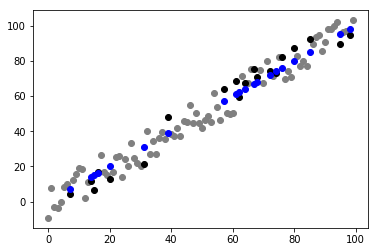

In [22]:
plt.scatter(training_x, training_y, color = 'grey')
plt.scatter(validation_x, validation_y, color = 'black')
plt.scatter(validation_x, prediction_y, color = 'blue')
#plt.plot(validation_x, prediction_y, color = 'blue', linewidth = 1)

plt.xticks()
plt.yticks()

plt.show()

Generate Random Exponential Data

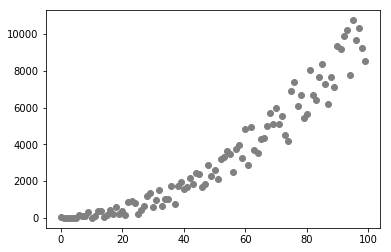

In [24]:
total_data = 100

x = np.arange(total_data)

np.random.shuffle(x)

delta = np.random.uniform(-10, 10, size = (total_data,))

y = np.power(x + delta, 2)

plt.scatter(x, y, color = 'gray')

plt.xticks()
plt.yticks()

plt.show()

In [25]:
polynomial_features = PolynomialFeatures(degree = 2, include_bias = False)

x = polynomial_features.fit_transform(x.reshape((total_data, 1)))

In [26]:
training_size = 0.8

total = x.shape[0]

training_size = round(total * training_size)
validation_size = total - training_size

training_X = x[:training_size]
validation_X = x[training_size:]

training_y = y[:training_size]
validation_y = y[training_size:]

Best Epoch: [99, 322821.2526839459]


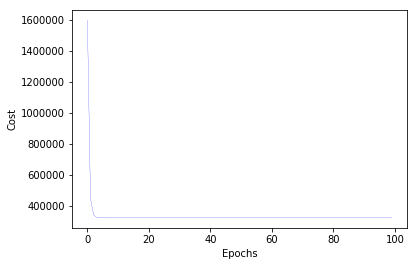

In [37]:
total_epoch = 100

regressor = linear_model.SGDRegressor(loss = "squared_loss",
                                      shuffle = False,
                                      max_iter = 1,
                                      learning_rate = "constant",
                                      penalty = None,
                                      eta0 = 0.000000001)


select = float('inf')
best_epoch = None
best_model = None

epochs = []

for epoch in range(total_epoch):
    
    regressor.partial_fit(training_X, training_y)
    prediction_y = regressor.predict(validation_X)
    mse = mean_squared_error(validation_y, prediction_y)
    
    if(mse < select):
        
        select = mse
        best_epoch = [epoch, mse]
        best_model = deepcopy(regressor)
    
    epochs.append([epoch, mse])
 

print("Best Epoch: " + str(best_epoch))

epochs = np.array(epochs)

plt.plot(epochs[:, 0:1], epochs[:, 1:2], linewidth = 0.2, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.show()

In [40]:
prediction_y = best_model.predict(validation_X)

[0.01570056 1.03565097]
[0.00024719]


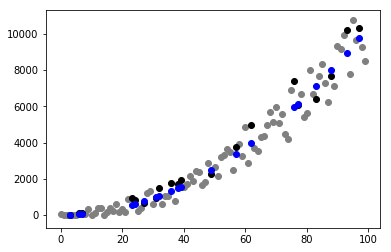

In [41]:
print(best_model.coef_)
print(best_model.intercept_)

plt.scatter(training_X[:, 0:1], training_y, color = 'grey')
plt.scatter(validation_X[:, 0:1], validation_y, color = 'black')
plt.scatter(validation_X[:, 0:1], prediction_y, color = 'blue')

plt.xticks()
plt.yticks()

plt.show()